In [1]:
# automatically reload edited modules
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from copy import  deepcopy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
import os
#os.chdir('/home/yash/Documents/EWC/Elastic-Weight-Consolidation')
os.chdir('/root/awid_dataset/')
import pandas as pd
# Read in the CSV files
dataset_columns = ['frame.interface_id',	'frame.dlt',	'frame.offset_shift',	'frame.time_epoch',	'frame.time_delta',	'frame.time_delta_displayed',	'frame.time_relative',	'frame.len',	'frame.cap_len',	'frame.marked',	'frame.ignored',	'radiotap.version',	'radiotap.pad',	'radiotap.length',	'radiotap.present.tsft',	'radiotap.present.flags',	'radiotap.present.rate',	'radiotap.present.channel',	'radiotap.present.fhss',	'radiotap.present.dbm_antsignal',	'radiotap.present.dbm_antnoise',	'radiotap.present.lock_quality',	'radiotap.present.tx_attenuation',	'radiotap.present.db_tx_attenuation',	'radiotap.present.dbm_tx_power',	'radiotap.present.antenna',	'radiotap.present.db_antsignal',	'radiotap.present.db_antnoise',	'radiotap.present.rxflags',	'radiotap.present.xchannel',	'radiotap.present.mcs',	'radiotap.present.ampdu',	'radiotap.present.vht',	'radiotap.present.reserved',	'radiotap.present.rtap_ns',	'radiotap.present.vendor_ns',	'radiotap.present.ext',	'radiotap.mactime',	'radiotap.flags.cfp',	'radiotap.flags.preamble',	'radiotap.flags.wep',	'radiotap.flags.frag',	'radiotap.flags.fcs',	'radiotap.flags.datapad',	'radiotap.flags.badfcs',	'radiotap.flags.shortgi',	'radiotap.datarate',	'radiotap.channel.freq',	'radiotap.channel.type.turbo',	'radiotap.channel.type.cck',	'radiotap.channel.type.ofdm',	'radiotap.channel.type.2ghz',	'radiotap.channel.type.5ghz',	'radiotap.channel.type.passive',	'radiotap.channel.type.dynamic',	'radiotap.channel.type.gfsk',	'radiotap.channel.type.gsm',	'radiotap.channel.type.sturbo',	'radiotap.channel.type.half',	'radiotap.channel.type.quarter',	'radiotap.dbm_antsignal',	'radiotap.antenna',	'radiotap.rxflags.badplcp',	'wlan.fc.type_subtype',	'wlan.fc.version',	'wlan.fc.type',	'wlan.fc.subtype',	'wlan.fc.ds',	'wlan.fc.frag',	'wlan.fc.retry',	'wlan.fc.pwrmgt',	'wlan.fc.moredata',	'wlan.fc.protected',	'wlan.fc.order',	'wlan.duration',	'wlan.ra',	'wlan.da',	'wlan.ta',	'wlan.sa',	'wlan.bssid',	'wlan.frag',	'wlan.seq',	'wlan.bar.type',	'wlan.ba.control.ackpolicy',	'wlan.ba.control.multitid',	'wlan.ba.control.cbitmap',	'wlan.bar.compressed.tidinfo',	'wlan.ba.bm',	'wlan.fcs_good',	'wlan_mgt.fixed.capabilities.ess',	'wlan_mgt.fixed.capabilities.ibss',	'wlan_mgt.fixed.capabilities.cfpoll.ap',	'wlan_mgt.fixed.capabilities.privacy',	'wlan_mgt.fixed.capabilities.preamble',	'wlan_mgt.fixed.capabilities.pbcc',	'wlan_mgt.fixed.capabilities.agility',	'wlan_mgt.fixed.capabilities.spec_man',	'wlan_mgt.fixed.capabilities.short_slot_time',	'wlan_mgt.fixed.capabilities.apsd',	'wlan_mgt.fixed.capabilities.radio_measurement',	'wlan_mgt.fixed.capabilities.dsss_ofdm',	'wlan_mgt.fixed.capabilities.del_blk_ack',	'wlan_mgt.fixed.capabilities.imm_blk_ack',	'wlan_mgt.fixed.listen_ival',	'wlan_mgt.fixed.current_ap',	'wlan_mgt.fixed.status_code',	'wlan_mgt.fixed.timestamp',	'wlan_mgt.fixed.beacon',	'wlan_mgt.fixed.aid',	'wlan_mgt.fixed.reason_code',	'wlan_mgt.fixed.auth.alg',	'wlan_mgt.fixed.auth_seq',	'wlan_mgt.fixed.category_code',	'wlan_mgt.fixed.htact',	'wlan_mgt.fixed.chanwidth',	'wlan_mgt.fixed.fragment',	'wlan_mgt.fixed.sequence',	'wlan_mgt.tagged.all',	'wlan_mgt.ssid',	'wlan_mgt.ds.current_channel',	'wlan_mgt.tim.dtim_count',	'wlan_mgt.tim.dtim_period',	'wlan_mgt.tim.bmapctl.multicast',	'wlan_mgt.tim.bmapctl.offset',	'wlan_mgt.country_info.environment',	'wlan_mgt.rsn.version',	'wlan_mgt.rsn.gcs.type',	'wlan_mgt.rsn.pcs.count',	'wlan_mgt.rsn.akms.count',	'wlan_mgt.rsn.akms.type',	'wlan_mgt.rsn.capabilities.preauth',	'wlan_mgt.rsn.capabilities.no_pairwise',	'wlan_mgt.rsn.capabilities.ptksa_replay_counter',	'wlan_mgt.rsn.capabilities.gtksa_replay_counter',	'wlan_mgt.rsn.capabilities.mfpr',	'wlan_mgt.rsn.capabilities.mfpc',	'wlan_mgt.rsn.capabilities.peerkey',	'wlan_mgt.tcprep.trsmt_pow',	'wlan_mgt.tcprep.link_mrg',	'wlan.wep.iv',	'wlan.wep.key',	'wlan.wep.icv',	'wlan.tkip.extiv',	'wlan.ccmp.extiv',	'wlan.qos.tid',	'wlan.qos.priority',	'wlan.qos.eosp',	'wlan.qos.ack',	'wlan.qos.amsdupresent',	'wlan.qos.buf_state_indicated',	'wlan.qos.bit4',	'wlan.qos.txop_dur_req',	'wlan.qos.buf_state_indicated',	'data.len',	'class']

print("Reading training csv file.")
df1 = pd.read_csv('awid_train_set')
df1.columns = dataset_columns
#Fllling the entries "?" with "0"
df1=df1.replace('?',0)

df1.drop([dataset_columns[i] for i in [33, 63, 67, 75, 76, 77, 78, 79, 82, 86, 87, 91, 103, 104, 105, 106, 108, 109, 111, 113, 114,118, 123, 124, 132, 133, 139,  141, 142, 143, 147 ]], axis=1, inplace=True) 

print("Reading testing csv file.")
df2 = pd.read_csv('awid_test_set')
df2.columns = dataset_columns
#Fllling the entries "?" with "0"
df2=df2.replace('?',0)

df2.drop([dataset_columns[i] for i in [33, 63, 67, 75, 76, 77, 78, 79, 82, 86, 87, 91, 103, 104, 105, 106, 108, 109, 111, 113, 114,118, 123, 124, 132, 133, 139,  141, 142, 143, 147 ]], axis=1, inplace=True)  

df = pd.concat([df1, df2])
print(len(df),len(df1),len(df2),len(df1)+len(df2))

print (len(df['class'].unique()),df['class'].unique(),len(df.columns))
os.chdir('/root/Elastic-Weight-Consolidation-task-continual/AWID-EWC/')
obj_df = df.loc[:, (df != 0).any(axis=0)]

y = obj_df["class"]
#obj_df=pd.get_dummies(obj_df, columns=["class"])

x = obj_df.values[:,:-1]  #It has 17 labels 


/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Reading training csv file.


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Reading testing csv file.
2371216 575642 1795574 2371216
17 ['normal' 'fragmentation' 'arp' 'probe_request' 'chop_chop' 'rts'
 'deauthentication' 'amok' 'beacon' 'evil_twin' 'cafe_latte' 'cts' 'hirte'
 'power_saving' 'disassociation' 'authentication_request' 'probe_response'] 124


In [2]:
#Counting the number of records in each class
for label in df['class'].unique():
    print(label + ':' + str(y.tolist().count(label)))

normal:2163973
fragmentation:937
arp:78253
probe_request:369
chop_chop:2871
rts:199
deauthentication:14892
amok:31657
beacon:2398
evil_twin:3244
cafe_latte:46268
cts:1759
hirte:19089
power_saving:165
disassociation:84
authentication_request:3500
probe_response:1558


In [3]:
#since these classes have very large samples, randomly sample some records to make labels balanced.
from more_itertools import locate
sample_size = 10000
Yss = {}
length = 0
for label in df['class'].unique().tolist():
    if y.tolist().count(label) > sample_size:
        sample_inds = np.random.randint(0, y.tolist().count(label), sample_size )
        all_inds =  list(locate(y, lambda a: a == label))
        Yss[label] = np.array(all_inds)[sample_inds]
    else:
        Yss[label] = list(locate(y, lambda a: a == label))
    print(label, len(Yss[label]))  
    length = length + len(Yss[label])
print('size of dataset:{}'.format(length))

normal 10000
fragmentation 937
arp 10000
probe_request 369
chop_chop 2871
rts 199
deauthentication 10000
amok 10000
beacon 2398
evil_twin 3244
cafe_latte 10000
cts 1759
hirte 10000
power_saving 165
disassociation 84
authentication_request 3500
probe_response 1558
size of dataset:77084


In [4]:
#Recreating X and Y by subsampling the class with large records
from itertools import chain
inds = list(chain.from_iterable(Yss.values()))
X=x[inds]
cleanup_nums = {"normal":0, "fragmentation":1, "arp":2, "probe_request":3, "chop_chop":4, "rts":5, "deauthentication":6, "amok":7, "beacon":8, "evil_twin":9, "cafe_latte":10, "cts":11, "hirte":12, "power_saving":13, "disassociation":14, "authentication_request":15, "probe_response":16}
y.replace(cleanup_nums,inplace=True)
Y_all_attacks = y.values[inds]
print (X.shape, Y_all_attacks.shape)

(77084, 98) (77084,)


/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [5]:
print("Datasetset Formatting")

for j in range(0,X.shape[1]):
    maximum = max([float(k) for k in X[:,j]]) if  max([float(k) for k in X[:,j]]) != 0 else 1
    print(j)
    for i in range(0,len(X)):
        X[i,j] = round(float(X[i,j])/maximum,3)

Datasetset Formatting
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train_all_attacks, Y_test_all_attacks = train_test_split(X, Y_all_attacks, test_size=0.33)
print (X_train.shape, Y_train_all_attacks.shape)
print(X_test.shape, Y_test_all_attacks.shape)

(51646, 98) (51646,)
(25438, 98) (25438,)


In [7]:
import pdb
print(X_train.shape, X_test.shape, Y_train_all_attacks.shape, Y_test_all_attacks.shape)

from keras.utils import np_utils

#task_labels = [[0,1], [2,3], [4,5], [6,7], [8,9],[10,11],[12,13],[14,15],[0,16]]
task_labels = [[0,16], [14,15], [12,13], [10,11],[8,9],[6,7],[4,5],[3,2],[0,1]]
#task_labels = [[8,9], [6,7], [4,5], [2,3], [0,1]]
#task_labels = [[0,9], [7,8], [3,6], [1,4], [2,5]]
#task_labels = [[3,4,5], [1,2], [6,7,8],[9,10,11],[3,4],[12,13,14]]
n_tasks = len(task_labels)
nb_classes  = 17
training_datasets = []
validation_datasets = []
multihead=False

for labels in task_labels:
    idx = np.in1d(Y_train_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_train[idx], np_utils.to_categorical(label_map[Y_train_all_attacks[idx]], len(labels))
    else:
        data = X_train[idx], np_utils.to_categorical(Y_train_all_attacks[idx], nb_classes)
        training_datasets.append(data)

for labels in task_labels:
    idx = np.in1d(Y_test_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_test[idx], np_utils.to_categorical(label_map[Y_test_all_attacks[idx]], len(labels))
    else:
        data = X_test[idx], np_utils.to_categorical(Y_test_all_attacks[idx], nb_classes)
        validation_datasets.append(data)
        
tasks_train={}; labels_train = {}; tasks_test = {}; labels_test = {}

for i in range(len(task_labels)):
    tasks_train[str(i)] = training_datasets[i][0]
    labels_train[str(i)] = training_datasets[i][1]
    tasks_test[str(i)] = validation_datasets[i][0]
    labels_test[str(i)] = validation_datasets[i][1]
    print('Rank of the training task {} is {}'.format(i,np.linalg.matrix_rank(np.matrix(training_datasets[i][0], dtype='float'))))
    print('Task {0} size: Trainset - {1}, {2}, Testset - {3}, {4}'.format(i,tasks_train[str(i)].shape, labels_train[str(i)].shape, tasks_test[str(i)].shape, labels_test[str(i)].shape))

(51646, 98) (25438, 98) (51646,) (25438,)


Using TensorFlow backend.


Rank of the training task 0 is 53
Task 0 size: Trainset - (7729, 98), (7729, 17), Testset - (3829, 98), (3829, 17)
Rank of the training task 1 is 8
Task 1 size: Trainset - (2388, 98), (2388, 17), Testset - (1196, 98), (1196, 17)
Rank of the training task 2 is 15
Task 2 size: Trainset - (6802, 98), (6802, 17), Testset - (3363, 98), (3363, 17)
Rank of the training task 3 is 15
Task 3 size: Trainset - (7886, 98), (7886, 17), Testset - (3873, 98), (3873, 17)
Rank of the training task 4 is 18
Task 4 size: Trainset - (3809, 98), (3809, 17), Testset - (1833, 98), (1833, 17)
Rank of the training task 5 is 9
Task 5 size: Trainset - (13374, 98), (13374, 17), Testset - (6626, 98), (6626, 17)
Rank of the training task 6 is 12
Task 6 size: Trainset - (2061, 98), (2061, 17), Testset - (1009, 98), (1009, 17)
Rank of the training task 7 is 8
Task 7 size: Trainset - (6948, 98), (6948, 17), Testset - (3421, 98), (3421, 17)
Rank of the training task 8 is 35
Task 8 size: Trainset - (7365, 98), (7365, 17),

In [8]:
#Task labels sanity check for train set. Each row must has only one '1' 
print('Sanity check for train set. Each row must has only one 1.')
for i in range(len(labels_train)):
    for j in range(len(labels_train[str(i)])):
        if sum(labels_train[str(i)][j]) > 1 or sum(labels_train[str(i)][j]) == 0:
            print(i,j) 

#Task labels sanity check for test set. Each row must has only one '1' 
print('Sanity check for test set. Each row must has only one 1.')
for i in range(len(labels_test)):
    for j in range(len(labels_test[str(i)])):
        if sum(labels_test[str(i)][j]) > 1 or sum(labels_test[str(i)][j]) == 0:
            print(i,j)

#Task labels sanity check for train set. Each task label must has 1 at right location
print('Sanity check for train set. Each task has 1 at right location.')
for i in range(len(labels_train)):
    for j in range(len(labels_train[str(i)])):
        if sum(labels_train[str(i)][j][task_labels[i]]) != 1:
            print(i,j)
           
            
#Task labels sanity check for test set. Each task must has a non zero label
print('Sanity check for test set. Each task has 1 at right location.')
for i in range(len(labels_test)):
    for j in range(len(labels_test[str(i)])):
        if sum(labels_test[str(i)][j][task_labels[i]]) != 1:
            print(i,j)

Sanity check for train set. Each row must has only one 1.
Sanity check for test set. Each row must has only one 1.
Sanity check for train set. Each task has 1 at right location.
Sanity check for test set. Each task has 1 at right location.


In [9]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
import datetime
from tensorflow.contrib.learn.python.learn.datasets.mnist import DataSet
from tensorflow.contrib.learn.python.learn.datasets import base
from tensorflow.python.framework import dtypes
os.chdir('/root/OWM/Disjoint MNIST/OWM/')
from OWMLayer_2Layers import OWMLayer
import os
import pdb
import pprint
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # ignore warning
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # use gpu0,1
# Parameters
# ==================================================
tf.flags.DEFINE_integer("num_checkpoints", 3, "Number of checkpoints to store (default: 5)")
tf.flags.DEFINE_boolean("allow_soft_placement", True, "Allow device soft device placement")
tf.flags.DEFINE_boolean("log_device_placement", False, "Log placement of ops on devices")
tf.app.flags.DEFINE_string("buckets", "", "")
tf.app.flags.DEFINE_string("checkpointDir", "", "oss info")
tf.flags.DEFINE_integer("num_class", 17, "")
tf.flags.DEFINE_integer("batch_size", 64, "Batch Size (default: 64)")
tf.flags.DEFINE_integer("epoch", 5, "")
FLAGS = tf.flags.FLAGS
# ==================================================

In [10]:
import pdb
def next_batch(l, n,m): 
    final = [l[i * n:(i + 1) * n,:] for i in range((len(l) + n - 1) // n )]
    #Repeating the frazme segmentation for different epochs
    if m >= len(final): 
        m = m % len(final)
        if m == 0:
            np.random.shuffle(l)
            final = [l[i * n:(i + 1) * n,:] for i in range((len(l) + n - 1) // n )]
    return(final[m]) 

#Heuristic metric: Weights Pattern after training each task
from math import*
#1. Euclidean distance
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

#2. Cosine Similarity
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

#3. Jaccard similarity
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

#4. Using SequenceMatcher    
from difflib import SequenceMatcher

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Training Disjoint AWID Task 1
Task performs classification between {0, 16}
Shape of P1 = (99, 99). Rank of P1 = 98. Shape of P2 = (21, 21). Rank of P2=21
Number of non-zero in P1 = 4929, in P2=363
Test on Previous Datasets:
{'Task1': 0.857404,
 'Task2': 0.0,
 'Task3': 0.0,
 'Task4': 0.0,
 'Task5': 0.0,
 'Task6': 0.0,
 'Task7': 0.0,
 'Task8': 0.0,
 'Task9': 0.91909295}
Training Disjoint AWID Task 2
Task performs classification between {14, 15}
Shape of P1 = (99, 99). Rank of P1 = 97. Shape of P2 = (21, 21). Rank of P2=21
Number of non-zero in P1 = 4929, in P2=363
Test on Previous Datasets:
{'Task1': 0.857404,
 'Task2': 0.0,
 'Task3': 0.0,
 'Task4': 0.0,
 'Task5': 0.0,
 'Task6': 0.0,
 'Task7': 0.0,
 'Task8': 0.0,
 'Task9': 0.9190

SystemExit: 

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


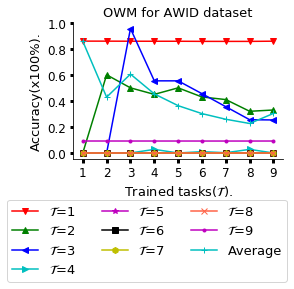

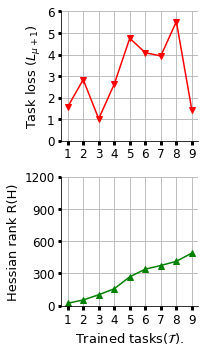

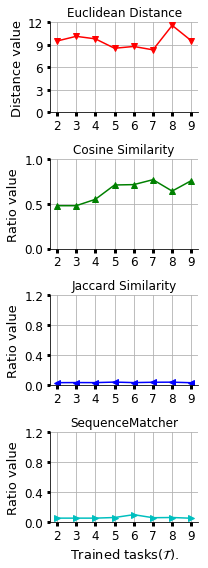

In [11]:
from numpy import count_nonzero
def train(Task_list):
    # Training
    # ==================================================
    g1 = tf.Graph()
    middle = 20
    with g1.as_default():
        OWM = OWMLayer([[98 + 1, middle], [middle + 1, 17]], seed_num=32)

    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    test_array = []
    Gradients = []
    Weights = []
    Tasks_Accuracy = []
    loss_after_task = []
    with tf.Session(graph=g1, config=config) as sess1:
        # Initialize all variables
        init = [tf.global_variables_initializer(), tf.local_variables_initializer()]
        sess1.run(init)
        task_num = len(task_labels)
        for j in range(0, task_num):
            print("Training Disjoint AWID Task %d" % (j + 1))
            
            # Update the parameters
            epoch_owm = FLAGS.epoch
            batch_size_owm = FLAGS.batch_size
            #print('Task performs classification between {0} and rest.'.format(set(np.argmax(mnist_list[j].train.labels,axis=1))))
            print('Task performs classification between {0}'.format(set(np.argmax(Task_list[1][str(j)],axis=1))))
            all_data = len(Task_list[1][str(j)][:])
            all_step = all_data*epoch_owm//batch_size_owm
            for current_step in range(all_step):
                lamda = current_step/all_step
                current_step = current_step+1
                batch_xs = next_batch(Task_list[0][str(j)][:], batch_size_owm, current_step)
                batch_ys = next_batch(Task_list[1][str(j)][:], batch_size_owm, current_step)
                feed_dict = {
                    OWM.input_x: batch_xs,
                    OWM.input_y: batch_ys,
                    OWM.lr_array: np.array([[0.05]]),
                    OWM.alpha_array: np.array([[0.9 * 0.001 ** lamda, 0.6]]),
                }
                acc, loss, grads_var, _, = sess1.run([OWM.accuracy, OWM.loss, OWM.grads , OWM.back_forward], feed_dict,)
                '''
                if current_step % (all_step // 2) == 0:
                    print("Train->>>Task: [{:d}/{:d}] Step: {:d}/{:d} Train: loss: {:.2f}, acc: {:.2f}  %"
                          .format(j+1, task_num, current_step*epoch_owm // all_step+1,
                                  epoch_owm, loss, acc * 100))
                if current_step % (all_step // 20) == 0:
                    feed_dict = {
                        OWM.input_x: Task_list[2][str(j)][:],
                        OWM.input_y: Task_list[3][str(j)][:],
                    }
                    acc, loss = sess1.run([OWM.accuracy, OWM.loss], feed_dict)
                    print("Eval->>> Task: [{:d}/{:d}] Step: [{:d}/{:d}] acc: {:g}  %"
                          .format(j+1, task_num, current_step*epoch_owm // all_step+1, epoch_owm, acc * 100))
                '''
            print('Shape of P1 = {}. Rank of P1 = {}. Shape of P2 = {}. Rank of P2={}'.format(sess1.run(OWM.P1, feed_dict,).shape, np.linalg.matrix_rank(sess1.run(OWM.P1, feed_dict,)), sess1.run(OWM.P2, feed_dict,).shape, np.linalg.matrix_rank(sess1.run(OWM.P2, feed_dict,))))
            print('Number of non-zero in P1 = {}, in P2={}'.format(count_nonzero(sess1.run(OWM.P1, feed_dict,)), count_nonzero(sess1.run(OWM.P2, feed_dict,))))
            loss_after_task.append(loss)
            Gradients.append([grads_var[0][0], grads_var[0][1]])
            Weights.append([grads_var[1][0], grads_var[1][1]])        
            print("Test on Previous Datasets:")
            correct = []
            Per_task_acc_holder = {}
            for i_test in range(task_num):
                feed_dict = {
                    OWM.input_x: Task_list[2][str(i_test)][:],
                    OWM.input_y: Task_list[3][str(i_test)][:],
                }
                accu, = sess1.run([OWM.accuracy], feed_dict)
                Per_task_acc_holder['Task' + str(i_test+1)] = accu
                correct.append(accu)
            pprint.pprint(Per_task_acc_holder)
            Tasks_Accuracy.append(correct)
            test_accu = np.mean(correct)
            test_array.append(test_accu)
            #print("Aggregate Test Accuracy:->>>[{:d}/{:d}], acc: {:.2f} %".format(j + 1, task_num, test_accu))
        Y_test_onehot_encoded = pd.get_dummies(Y_test_all_attacks)
        feed_dict = {
            OWM.input_x: X_test,
            OWM.input_y: Y_test_onehot_encoded.values,
        }
        accu, loss = sess1.run([OWM.accuracy, OWM.loss], feed_dict)
        #print("accu_owm {:g} %\n".format(accu * 100))
        #print('Aggregate test accuracy of trained tasks after completing each task trainng: {}'.format(test_array))
        return(Gradients,Weights, Tasks_Accuracy, loss_after_task)

def main(_):
    # Create 10 disjoint MNIST datasets
    Task_list = [tasks_train, labels_train, tasks_test, labels_test]
    Gradients, Weights, Tasks_Accuracy,loss_after_task = train(Task_list)
    print('Tasks_Accuracy = {}, loss_after_task = {}'.format(Tasks_Accuracy, loss_after_task))
    import pdb
    import seaborn as sns
    from matplotlib.pyplot import figure
    figure(figsize=(4, 4.5))
    axs = [plt.subplot(1,1,1)]#, None, None]
    fontsize = 13
    average_acc=[]
    for i in range(len(Tasks_Accuracy)):
        average_acc.append(np.mean(Tasks_Accuracy[i][:i+1]))
    Tasks_Accuracy = [[0.85887307, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09183559], 
                        [0.8586098, 0.60, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09180743], 
                        [0.8580832, 0.50, 0.955237, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09175113], 
                        [0.8578199, 0.450, 0.55377415, 0.02741143, 0.0, 0.0, 0.0, 0.0, 0.09172297], 
                        [0.8578199, 0.50, 0.55377415, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09172297], 
                        [0.85703003, 0.430, 0.455237, 0.010085338, 0.0, 0.0, 0.0, 0.0, 0.09163851], 
                        [0.8567667, 0.410, 0.355237, 0.002068787, 0.0, 0.0, 0.0, 0.0, 0.09161036], 
                        [0.8567667, 0.320, 0.255237, 0.02741143, 0.0, 0.0, 0.0, 0.0, 0.09161036], 
                        [0.8583465, 0.330, 0.25348155, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09177928]]
    print('Average accuracy = ',average_acc)
    colorVal = ['r','g','b','c','m','k','y','tomato','m','c']
    marker=["v","^","<",">","*","s","h","x",".","+"]
    n_tasks = 9
    mean_vals = np.array(Tasks_Accuracy)
    for j in range(n_tasks):
        label = "$\mathcal{T}$=%g"%(j+1)
        axs[0].plot(range(1,n_tasks+1), mean_vals[:, j], marker=marker[j], c=colorVal[j], label=label)
    axs[0].plot(range(1,n_tasks+1), average_acc, marker=marker[j+1], c=colorVal[j+1], label='Average')
    axs[0].legend(loc='upper right',prop={'size': fontsize}, bbox_to_anchor=(1.05, -0.25), ncol=3)
    axs[0].set_xlabel("Trained tasks($\mathcal{T}$).",fontsize=fontsize)
    axs[0].set_ylabel('Accuracy(x100%).',fontsize=fontsize)
    axs[0].set_xticks(range(1,n_tasks+1))
    axs[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axs[0].tick_params(labelsize='large', width=3)
    axs[0].set_title('OWM for AWID dataset', fontsize=fontsize)
    #plt.legend(bbox_to_anchor=(0.78, 0.66),bbox_transform=plt.gcf().transFigure)
    plt.gcf().tight_layout()
    sns.despine()
    plt.savefig('AWID_OWM.pdf',bbox_inches = "tight")
    
    
    def flatten(x):
        try:
            it = iter(x)
        except TypeError:
            yield x
        else:
            for i in it:
                for j in flatten(i):
                    yield j
    Flatten_weights=[]
    for i in range(len(Gradients)):
        Flatten_weights.append(list(flatten(Gradients[i]))) 
    '''
    #Creating the Hessian matrix from the gradients
    import math
    Hessian_matrix = []
    Hessian_row = []
    Rank_Hessian_matrix = []
    for k in range(len(Flatten_weights)):
        for i in range(len(Flatten_weights[k])):
            partial_deriv_1 = (math.ceil(Flatten_weights[k][i]*1e10)/1e10)
            for j in range(len(Flatten_weights[k])):
                partial_deriv_2 = (math.ceil(Flatten_weights[k][j]*1e10)/1e10)
                Hessian_row.append(np.around(partial_deriv_1*partial_deriv_2))
            Hessian_matrix.append(Hessian_row)
            Hessian_row = []
        rank_Hessian_matrix = np.linalg.matrix_rank(np.asarray(Hessian_matrix))
        Rank_Hessian_matrix.append(rank_Hessian_matrix)
        print('Rank of the Hessian Matrix after task=',k,'is :',rank_Hessian_matrix)  
    '''
    Rank_Hessian_matrix = [22, 53, 101, 157, 268, 339, 373, 412, 489]  #Calculated by uncommenting above code and then coped here
    
    figure(figsize=(3, 5))
    axs = [plt.subplot(2,1,1)]#, None, None]
    for i in range(1, 2):
        axs.append(plt.subplot(2, 1, i+1, sharex=axs[0]))
    fontsize = 13

    colorVal = ['r','g','b','c','m','k','y']
    marker=["v","^","<",">","*","s"]
    #loss_after_task[-1]=5
    plots = [loss_after_task,Rank_Hessian_matrix]
    ylabel = ['Task loss ($L_{\mu+1}$)', 'Hessian rank R(H)']
    ytick = [[0,1.0,2.0,3.0,4.0,5.0, 6.0], [0,300,600,900, 1200]]
    title = ['Loss', 'Hessian rank']
    for i in range(2):
        axs[i].plot(range(1,n_tasks+1), plots[i], marker=marker[i], c=colorVal[i])
        axs[i].set_ylabel(ylabel[i],fontsize=fontsize)
        axs[i].set_yticks(ytick[i])
        axs[i].tick_params(labelsize='large', width=3)
        axs[i].grid()
    axs[-1].set_xticks(range(1,n_tasks+1))
    axs[-1].set_xlabel("Trained tasks($\mathcal{T}$).",fontsize=fontsize)
    plt.tight_layout()
    sns.despine()
    plt.savefig('AWID_OWM_evalcongestion.pdf',bbox_inches = "tight")
    
    
    model_weights_save=[]
    for i in range(len(Weights)):
        model_weights_save.append(list(flatten(Weights[i])))
        
    print("--------------Euclidean distance--------------------")
    Eu_distance = []
    for i in range(1,n_tasks):
        eu_dist = euclidean_distance(list(flatten(model_weights_save[i-1])),list(flatten(model_weights_save[i])))
        Eu_distance.append(eu_dist)
        print("Between task {0} and {1} : {2}".format(i-1,i,eu_dist))

    print("--------------Cosine distance--------------------")
    Cos_distance = []
    for i in range(1,n_tasks):
        cos_dist = cosine_similarity(list(flatten(model_weights_save[i-1])),list(flatten(model_weights_save[i])))
        Cos_distance.append(cos_dist)
        print("Between task {0} and {1} : {2}".format(i-1,i,cos_dist))


    print("--------------Jaccard similarity--------------------")
    Jac_distance = []
    for i in range(1,n_tasks):
        jac_dist = jaccard_similarity(list(flatten(model_weights_save[i-1])),list(flatten(model_weights_save[i])))
        Jac_distance.append(jac_dist)
        print("Between task {0} and {1} : {2}".format(i-1,i,jac_dist))

    print("--------------Sequence Matcher--------------------")
    Seq_matcher = []
    for i in range(1,n_tasks):
        seq_matcher = SequenceMatcher(None,list(flatten(model_weights_save[i-1])),list(flatten(model_weights_save[i]))).ratio()
        Seq_matcher.append(seq_matcher)
        print("Between task {0} and {1} : {2}".format(i-1,i,seq_matcher))
    
    figure(figsize=(3, 8))
    plt.subplots_adjust(hspace=0.25,
                        wspace=0.35)
    axs = [plt.subplot(4,1,1)]#, None, None]
    for i in range(1, 4):
        axs.append(plt.subplot(4, 1, i+1, sharex=axs[0]))
    fontsize = 13
    colorVal = ['r','g','b','c','m','k','y']
    marker=["v","^","<",">","*","s"]
    plots = [Eu_distance,Cos_distance,Jac_distance,Seq_matcher]
    ylabel = ['Distance value', 'Ratio value', 'Ratio value','Ratio value']
    ytick = [[0.0, 3.0, 6.0, 9.0, 12.0], [0, 0.5, 1.0],[0, 0.4, 0.8, 1.2], [0, 0.4, 0.8, 1.2]]
    title = ['Euclidean Distance', 'Cosine Similarity', 'Jaccard Similarity', 'SequenceMatcher']
    for i in range(4):
        axs[i].plot(range(2,n_tasks+1), plots[i], marker=marker[i], c=colorVal[i])
        axs[i].set_ylabel(ylabel[i],fontsize=fontsize)
        axs[i].set_yticks(ytick[i])
        axs[i].tick_params(labelsize='large', width=3)
        axs[i].grid()
        axs[i].set_title(title[i])
    axs[-1].set_xticks(range(2,n_tasks+1))
    axs[-1].set_xlabel("Trained tasks($\mathcal{T}$).",fontsize=fontsize)
    plt.tight_layout()
    sns.despine()
    plt.savefig('AWID_OWM_Similaritymetric.pdf',bbox_inches = "tight")
    
    #Heuristic metric: Weights Pattern between task 0 and last task 
    n_tasks = len(model_weights_save)
    eu_dist = euclidean_distance(list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1])))
    print("Euclidean distance between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,eu_dist))

    cos_dist = cosine_similarity(list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1])))
    print("Cosine angle between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,cos_dist))

    jac_dist = jaccard_similarity(list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1])))
    print("Jaccard similarity between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,jac_dist))

    seq_matcher = SequenceMatcher(None,list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1]))).ratio()
    print("Sequence angle between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,seq_matcher))    

if __name__ == '__main__':
    tf.app.run()
